In [23]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

os.chdir('C:/Users/C10381149/OneDrive - Technological University Dublin/Documents/Python/Datasets/')

iris=pd.read_csv('iris.csv')
iris.columns=['sepal_length','sepal_width','petal_length','petal_width','type']

features=['sepal_length','sepal_width','petal_length','petal_width']
scaler=MinMaxScaler().fit(iris[features])
X = scaler.transform(iris[features])
y = iris['type']

#Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Training score: {:.2f}".format(knn.score(X_train,y_train)))
print("Testing score: {:.2f}".format(knn.score(X_test,y_test)))

Training score: 1.00
Testing score: 0.97


In [4]:
neighbors=[]
train_score=[]
test_score=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    neighbors.append(i)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [7]:
df=pd.DataFrame({"Neighbors":neighbors, "Train Score": train_score, "Test Score": test_score})

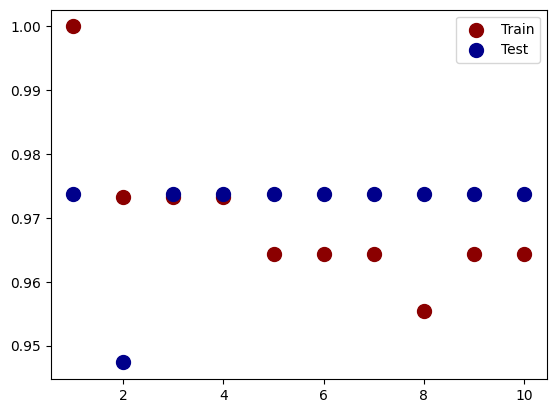

In [22]:
fig=plt.figure()
plt.scatter(x=neighbors, y=train_score, s=100, c='DarkRed', label="Train")
plt.scatter(x=neighbors, y=test_score, s=100, c='DarkBlue', label="Test")
plt.legend()
plt.show()

In [27]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,type
34,4.9,3.1,1.5,0.2,setosa


In [31]:
X_new = scaler.transform(pd.DataFrame({
    'sepal_length':[5.8],
    'sepal_width':[3],
    'petal_length':[3.8],
    'petal_width':[1.2]
}))
X_new

array([[0.41666667, 0.41666667, 0.47457627, 0.45833333]])

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
knn.predict(X_new)[0]

'versicolor'